**We will be defining our own convolution and maxpooling functions**

In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image, ImageOps

In [ ]:
leo = ImageOps.grayscale(Image.open('./lion.jpeg'))
leo_arr = np.array(leo)

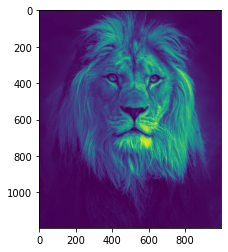

In [ ]:
plt.imshow(leo)

In [ ]:
leo_arr, leo_arr.shape

(array([[ 5,  5,  5, ...,  5,  5,  5],
        [ 5,  5,  5, ...,  5,  5,  5],
        [ 5,  5,  5, ...,  5,  5,  5],
        ...,
        [ 0,  0,  0, ..., 14, 12, 11],
        [ 0,  0,  0, ..., 16, 14, 13],
        [ 0,  0,  0, ..., 18, 17, 16]], dtype=uint8), (1195, 1000))

**Defining a convolution function which takes image array, filter as arguments**

In [ ]:
def conv2d(image_arr, filter):
  image_copy = np.copy(image_arr)
  szx,szy = image_copy.shape
  for x in range(1,szx-1):
    for y in range(1,szy-1):
      convolution = 0.0
      convolution = convolution + (image_arr[x - 1, y-1] * filter[0][0])
      convolution = convolution + (image_arr[x, y-1] * filter[0][1])
      convolution = convolution + (image_arr[x + 1, y-1] * filter[0][2])

      convolution = convolution + (image_arr[x-1, y] * filter[1][0])
      convolution = convolution + (image_arr[x, y] * filter[1][1])
      convolution = convolution + (image_arr[x+1, y] * filter[1][2])

      convolution = convolution + (image_arr[x-1, y+1] * filter[2][0])
      convolution = convolution + (image_arr[x, y+1] * filter[2][1])
      convolution = convolution + (image_arr[x+1, y+1] * filter[2][2])

      filter_wt_sum = np.sum(filter)
      
      if filter_wt_sum == 0:
        weight = 1
      else:
        weight = 1./filter_wt_sum
      convolution = convolution * weight
     
      if(convolution<0):
        convolution = 0
      if(convolution>255):
        convolution = 255
    
      image_copy[x, y] = convolution
  return image_copy

Outline Filter

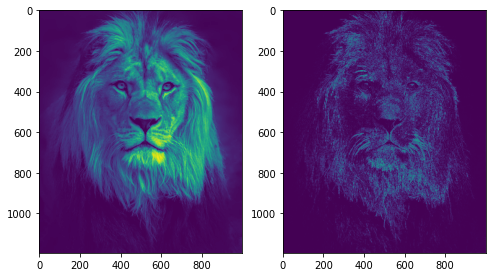

In [ ]:
conv_res = conv2d(image_arr=leo_arr, filter=[[-1, -1, -1],
[-1, 8, -1],
[-1, -1, -1]])
f, ax = plt.subplots(1,2, figsize=(8,12))
ax[0].imshow(leo_arr);
ax[1].imshow(conv_res);

Verticle edge filter

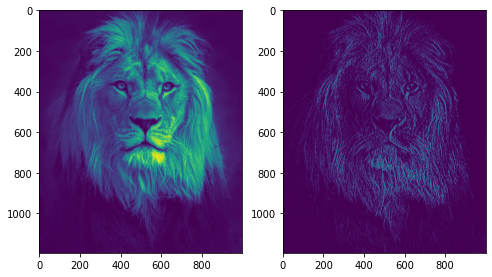

In [ ]:
conv_res = conv2d(image_arr=leo_arr, filter=[[-1, -1, -1],
[0, 0, 0],
[1, 1, 1]])
f, ax = plt.subplots(1,2, figsize=(8,12))
ax[0].imshow(leo_arr);
ax[1].imshow(conv_res);

Horizantal edge filter

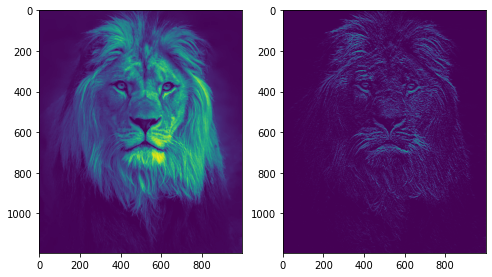

In [ ]:
conv_res = conv2d(image_arr=leo_arr, filter=[[-1, 0, 1],
[-1, 0, 1],
[-1, 0, 1]])
f, ax = plt.subplots(1,2, figsize=(8,12))
ax[0].imshow(leo_arr);
ax[1].imshow(conv_res);

Similarly we can have filters to blur, sharpen an image depending on the filter we take

If we choose filter = 

                    [[-1,-1,-1],
                    [-1,8,-1],
                    [-1,-1,-1]] 


any region which has uniform color becomes 0 on convolution, so we get black on that part on applying filter

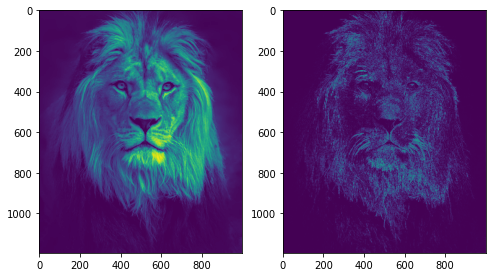

In [ ]:
filter=[[-1,-1,-1],
        [-1,8,-1],
        [-1,-1,-1]]
conv_res = conv2d(leo_arr, filter)
f, ax = plt.subplots(1,2, figsize=(8,12))
ax[0].imshow(leo_arr);
ax[1].imshow(conv_res);

**Defing Max Pooling function which takes an image array as argument**

In [ ]:
def maxpooling2d(image_arr):
  szx, szy = image_arr.shape

  new_szx, new_szy = szx // 2, szy // 2
  image_new = np.zeros((new_szx, new_szy))

  for x in range(0, szx-1, 2):
    for y in range(0, szy-1, 2):

      pixels = []

      pixels.append(image_arr[x, y])
      pixels.append(image_arr[x+1, y])

      pixels.append(image_arr[x, y+1])
      pixels.append(image_arr[x+1, y+1])

      image_new[x//2, y//2] = max(pixels)

  return image_new

Below code shows

1.   Original image
2.   Image after convolution with outline filter
3.   Maxpooling the convolution image



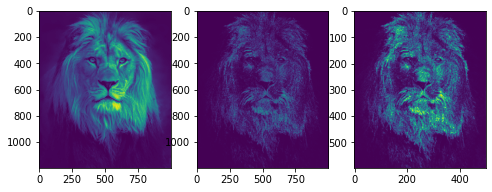

In [ ]:
conv_res = conv2d(image_arr=leo_arr, filter=[[-1, -1, -1],
[-1, 8, -1],
[-1, -1, -1]])
pool_res = maxpooling2d(conv_res)
f, ax = plt.subplots(1,3, figsize=(8,12))
ax[0].imshow(leo_arr);
ax[1].imshow(conv_res);
ax[2].imshow(pool_res)